In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## PCゲーム機

### 時刻別消費電力量
$$
E_{ Elc, game, d, t } =  (P_{ Elc, game, standby } \times t_{ game, standby , d, t } + P_{ Elc, game, play } \times t_{ game, play, d, t }) \times 10^{ -3 }
$$

$ E_{ Elc, game, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, game, standby } $：待機時の消費電力,W  
$ t_{ game, standby, d, t } $：日付dの時刻tにおける待機時間,h  
$ P_{ Elc, game, play } $：稼働時の消費電力,W  
$ t_{ game, play, d, t } $：日付dの時刻tにおける稼働時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_game_d_t(P_Elc_game_standby_measured, P_Elc_game_play_measured, t_game_standby_d_t, t_game_play_d_t):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    P_Elc_game_standby_measured : float
        待機時の消費電力の実測値, W
        
    P_Elc_game_play_measured : float
        稼働時の消費電力の実測値, W
        
    t_game_standby_d_t : ndarray(N-dimensional array)
        1年間の全時間の待機時間を格納したND配列, h
        d日t時の待機時間が年開始時から8760個連続して格納されている
    
    t_game_play_d_t : ndarray(N-dimensional array)
        1年間の全時間の稼働時間を格納したND配列, h
        d日t時の稼働時間が年開始時から8760個連続して格納されている

    Returns
    ----------
    E_Elc_game_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """
    
    P_Elc_game_standby = get_P_Elc_game_standby(P_Elc_game_standby_measured)
    P_Elc_game_play = get_P_Elc_game_play(P_Elc_game_play_measured)

    E_Elc_game_d_t \
        = P_Elc_game_standby * t_game_standby_d_t \
        + P_Elc_game_play * t_game_play_d_t
        
    E_Elc_game_d_t = E_Elc_game_d_t * 10**(-3)
    
    return E_Elc_game_d_t

### 動作別の消費電力

#### 待機時の消費電力  
$$
P_{ Elc, game, standby } =　P_{ Elc, game, standby, measured }
$$

$ P_{ Elc, game, standby, measured } $：待機時の平均消費電力（実測値:0.3）,W

In [3]:
def get_P_Elc_game_standby(P_Elc_game_standby_measured):
    """待機時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_game_standby_measured : float
        待機時の平均消費電力（実測値）, W

    Returns
    ----------
    P_Elc_game_standby : float
        稼働時消費電力, W
    """
        
    P_Elc_game_standby = P_Elc_game_standby_measured
        
    return P_Elc_game_standby

#### 稼働時の消費電力  
$$
P_{ Elc, game, play } =　P_{ Elc, game, play, measured }
$$

$ P_{ Elc, game, play, measured } $：稼働時の平均消費電力（実測値:95.7）,W

In [4]:
def get_P_Elc_game_play(P_Elc_game_play_measured):
    """稼働時の消費電力を計算する
    
    Parameters
    ----------
    P_Elc_game_play_measured : float
        稼働時の平均消費電力（実測値）, W

    Returns
    ----------
    P_Elc_game_play : float
        稼働時消費電力, W
    """
        
    P_Elc_game_play = P_Elc_game_play_measured
        
    return P_Elc_game_play

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [5]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['PCゲーム機_4人世帯_待機']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

In [6]:
def import_schedule_2_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['PCゲーム機_4人世帯_稼働']
    schedule_2_d_t = ds.values
    return schedule_2_d_t

#### 待機時の消費電力

In [7]:
get_P_Elc_game_standby(0.3)

0.3

#### 待機時の消費電力

In [8]:
get_P_Elc_game_play(95.7)

95.7

### 時刻別消費電力量

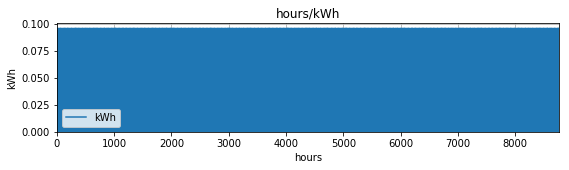

In [9]:
t_game_standby_d_t = import_schedule_1_d_t()
t_game_play_d_t = import_schedule_2_d_t()

x = np.arange(8760)
y = get_E_Elc_game_d_t(0.3, 95.7, t_game_standby_d_t, t_game_play_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [10]:
n = 1

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['PCゲーム機_' + str(n) + '人世帯_待機']
ds2 = df['PCゲーム機_' + str(n) + '人世帯_稼働']
    

dat = get_E_Elc_game_d_t(0.3, 95.7, ds1, ds2)

np.savetxt('game' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [11]:
n = 2

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['PCゲーム機_' + str(n) + '人世帯_待機']
ds2 = df['PCゲーム機_' + str(n) + '人世帯_稼働']
    

dat = get_E_Elc_game_d_t(0.3, 95.7, ds1, ds2)

np.savetxt('game' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [12]:
n = 3

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['PCゲーム機_' + str(n) + '人世帯_待機']
ds2 = df['PCゲーム機_' + str(n) + '人世帯_稼働']
    

dat = get_E_Elc_game_d_t(0.3, 95.7, ds1, ds2)

np.savetxt('game' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")

In [13]:
n = 4

df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
ds1 = df['PCゲーム機_' + str(n) + '人世帯_待機']
ds2 = df['PCゲーム機_' + str(n) + '人世帯_稼働']
    

dat = get_E_Elc_game_d_t(0.3, 95.7, ds1, ds2)

np.savetxt('game' + str(n) + '.csv',dat,delimiter=',',fmt = " %s ")